# Ejercicio Python de K-means
Realizaremos un ejercicio de prueba para comprender como funciona este algoritmo

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Cargamos los datos de entrada del archivo csv

In [10]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [11]:
dataframe.describe()

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


In [12]:
#vemos cuantos usuarios hay de cada categoria
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


Las categorias son: 1-actores 2-cantantes 3-modelo 4-TV 5-radio 6-tecnología 7-deportes 8-politica 9-escritor

## Visualizamos los datos

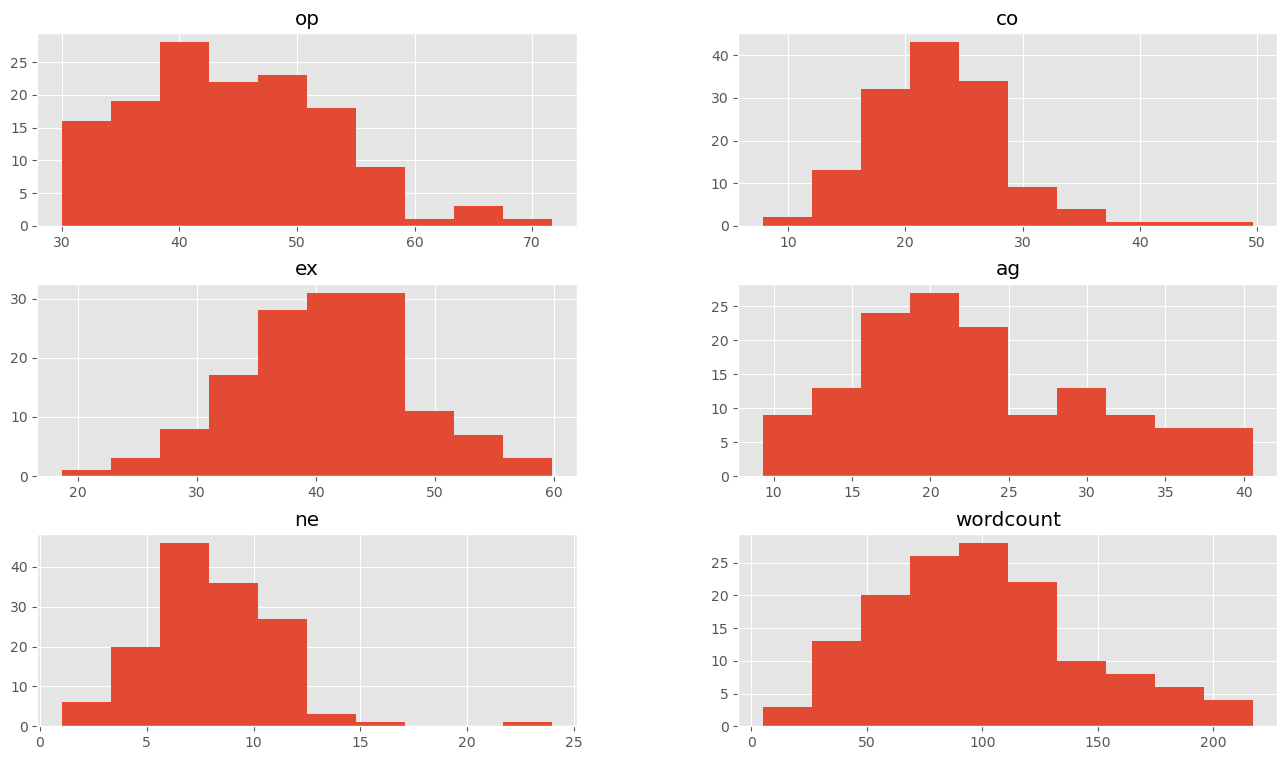

In [13]:
dataframe.drop('categoria', axis=1).hist()
plt.show()

/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


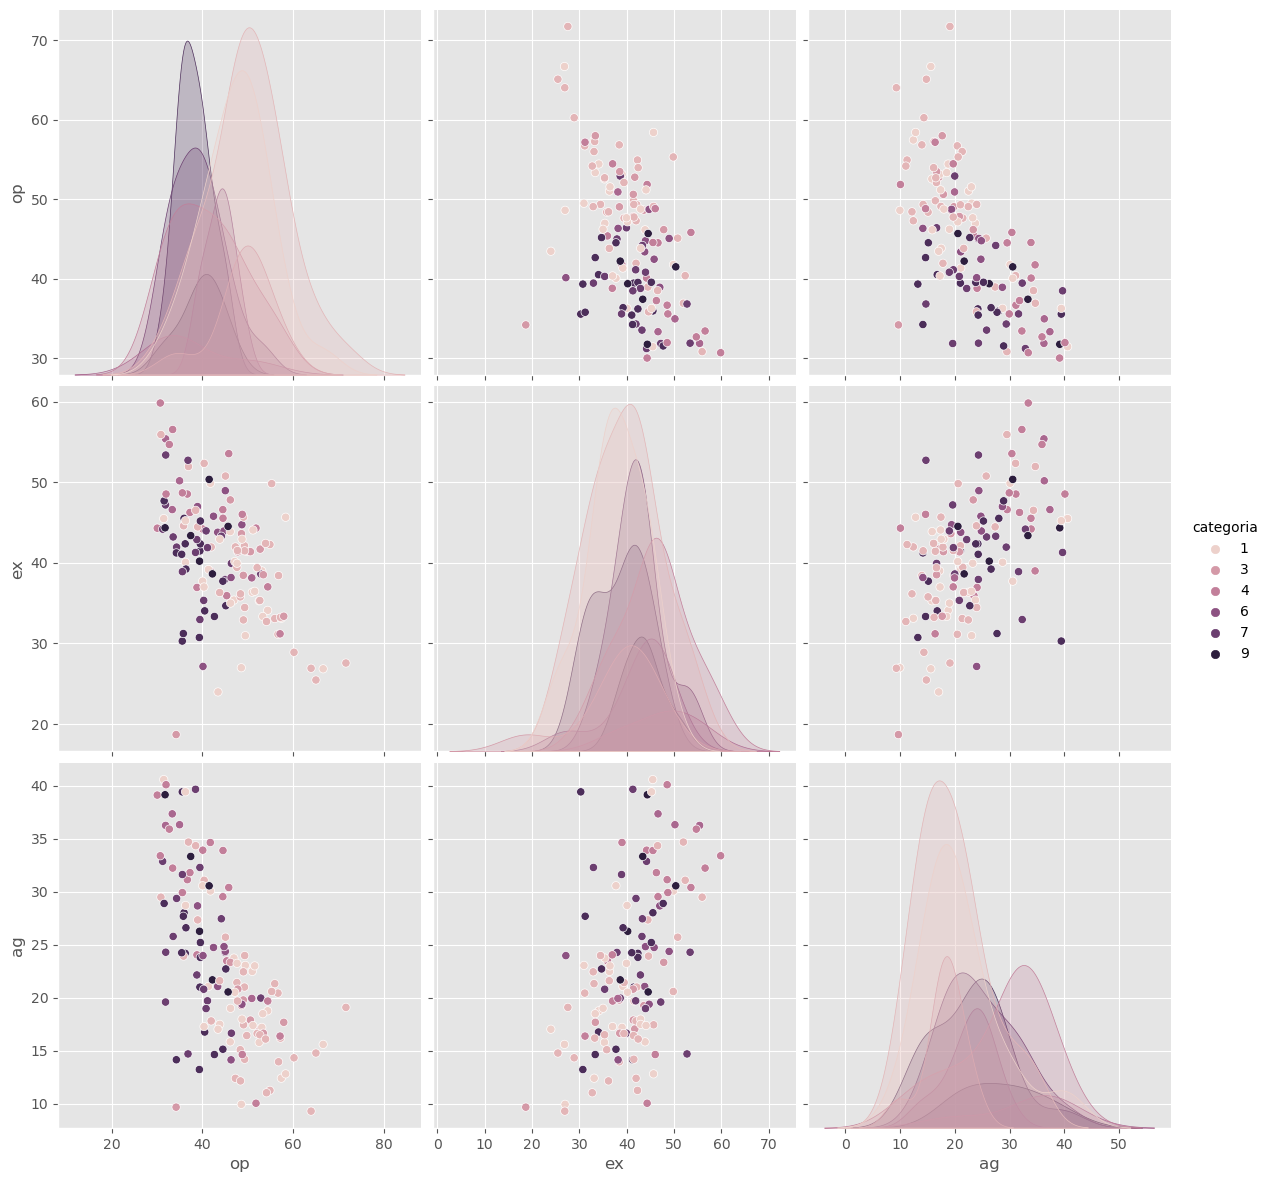

In [14]:
sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')

## Creamos el modelo

In [15]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria'])
X.shape

(140, 3)

In [16]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
#NOTA: asignamos la posición cero del array repetida pues las categorias comienzan en id 1. 
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

<Figure size 1600x900 with 0 Axes>

# Buscamos el valor K

/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
 

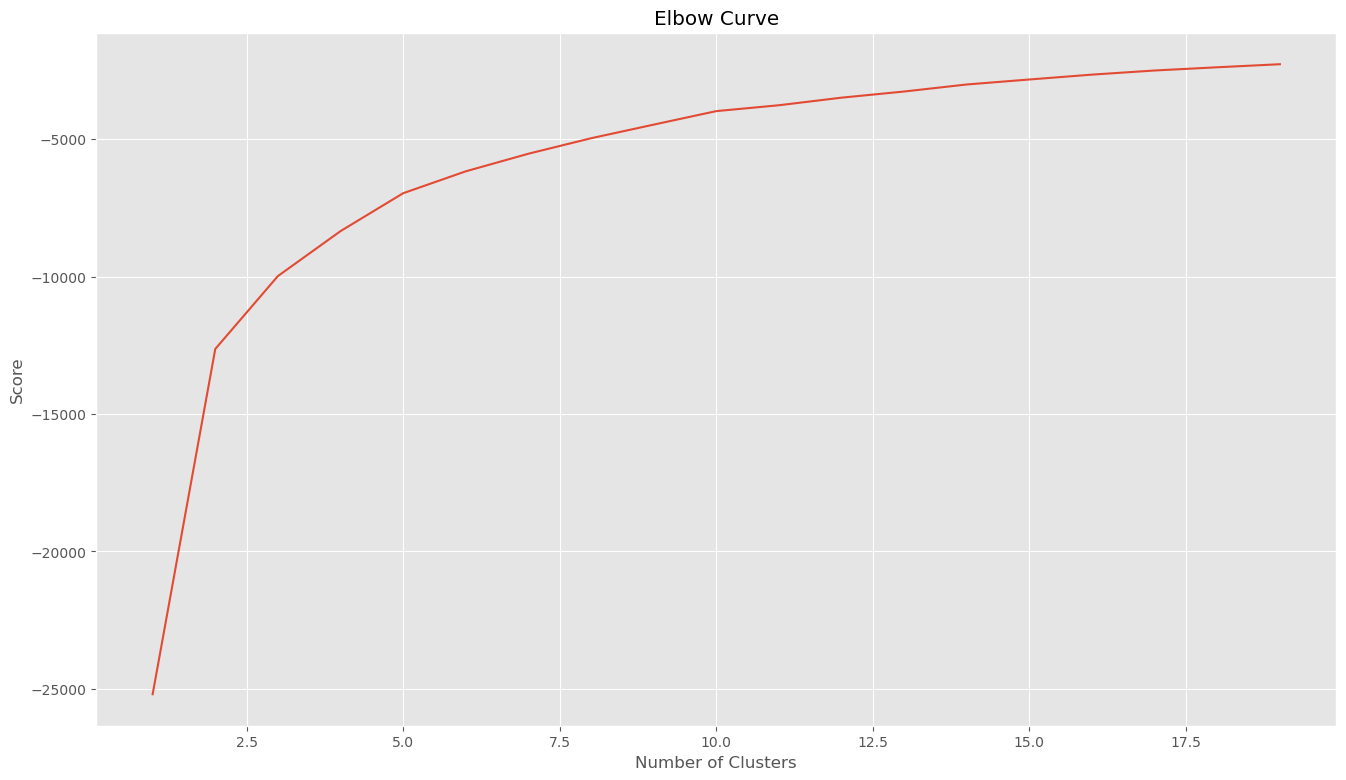

In [17]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [18]:
# Para el ejercicio, elijo 5 como un buen valor de K. Pero podría ser otro.
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[35.90241306 47.56828232 33.58748762]
 [50.42588653 40.66723528 17.30892463]
 [42.968253   32.53013537 20.93305995]
 [40.10497084 43.34066891 23.14697356]
 [58.70462307 30.53566167 15.72207033]]


/Users/jesus/miniconda3/envs/ml/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

<Figure size 1600x900 with 0 Axes>

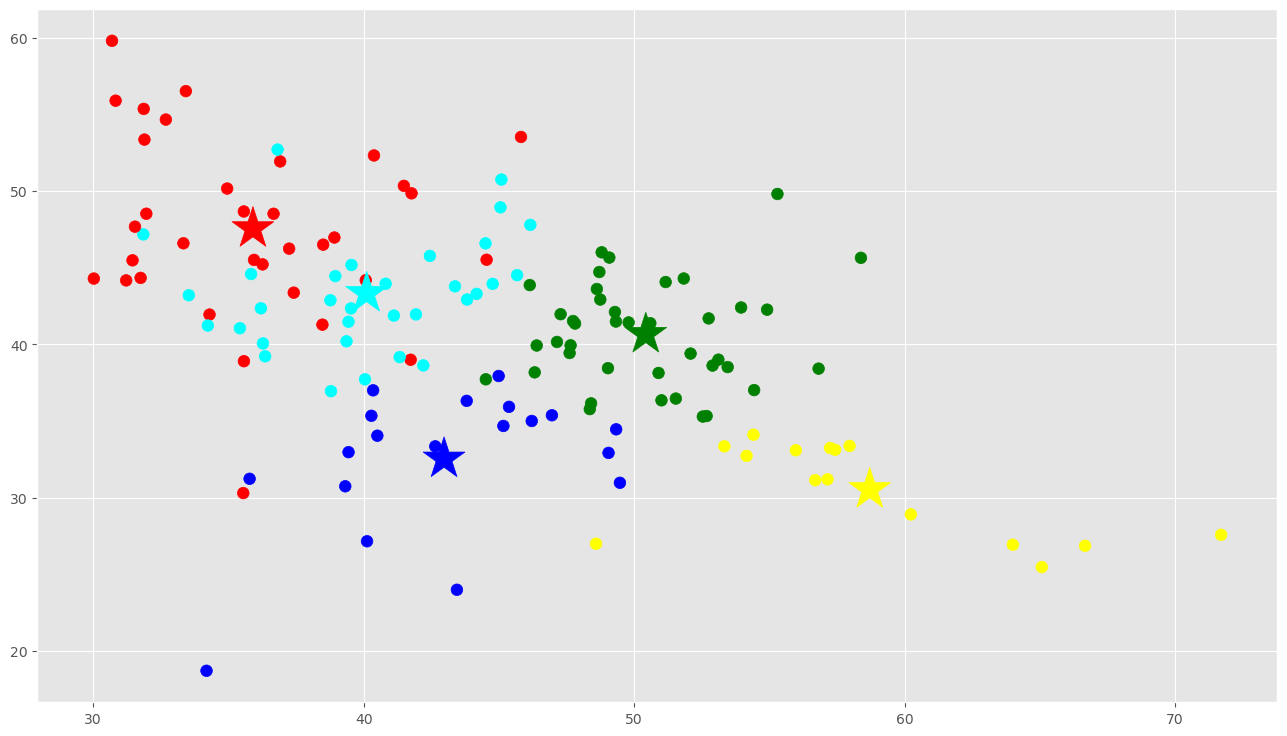

In [20]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ex'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

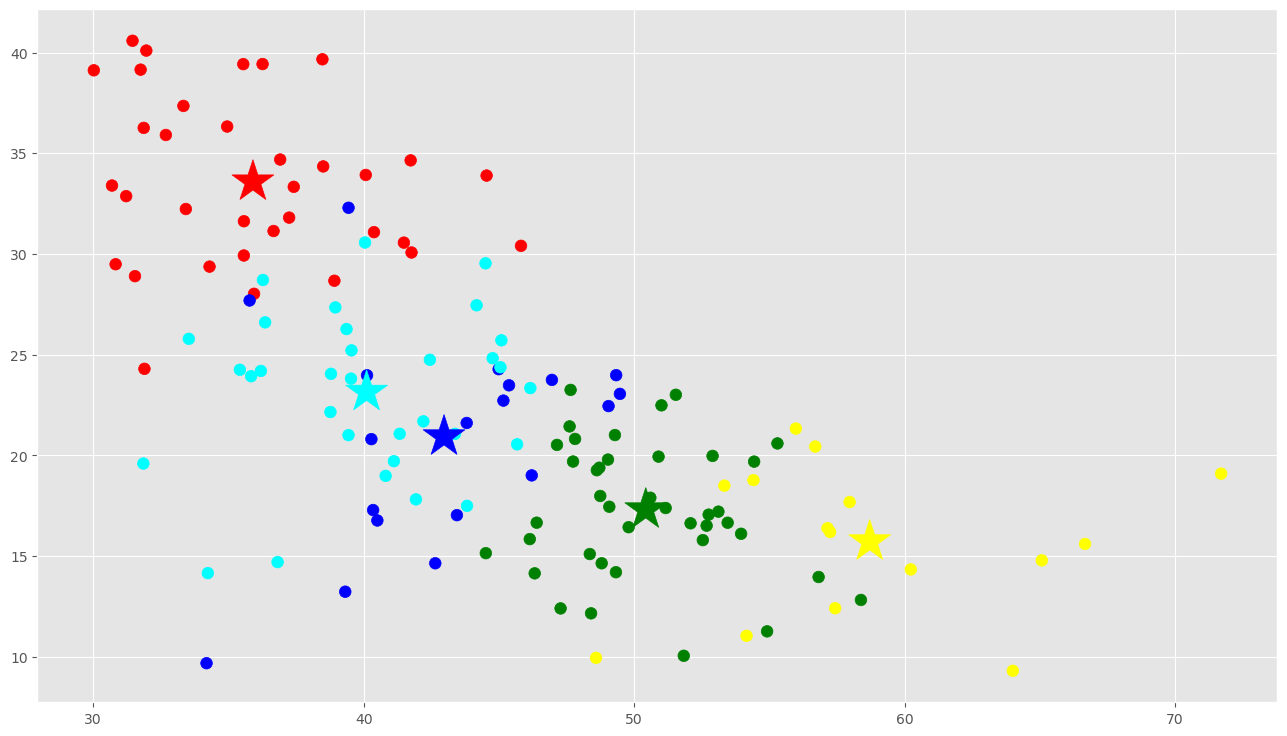

In [21]:
# Hacemos una proyección a 2D con los diversos ejes 
f1 = dataframe['op'].values
f2 = dataframe['ag'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

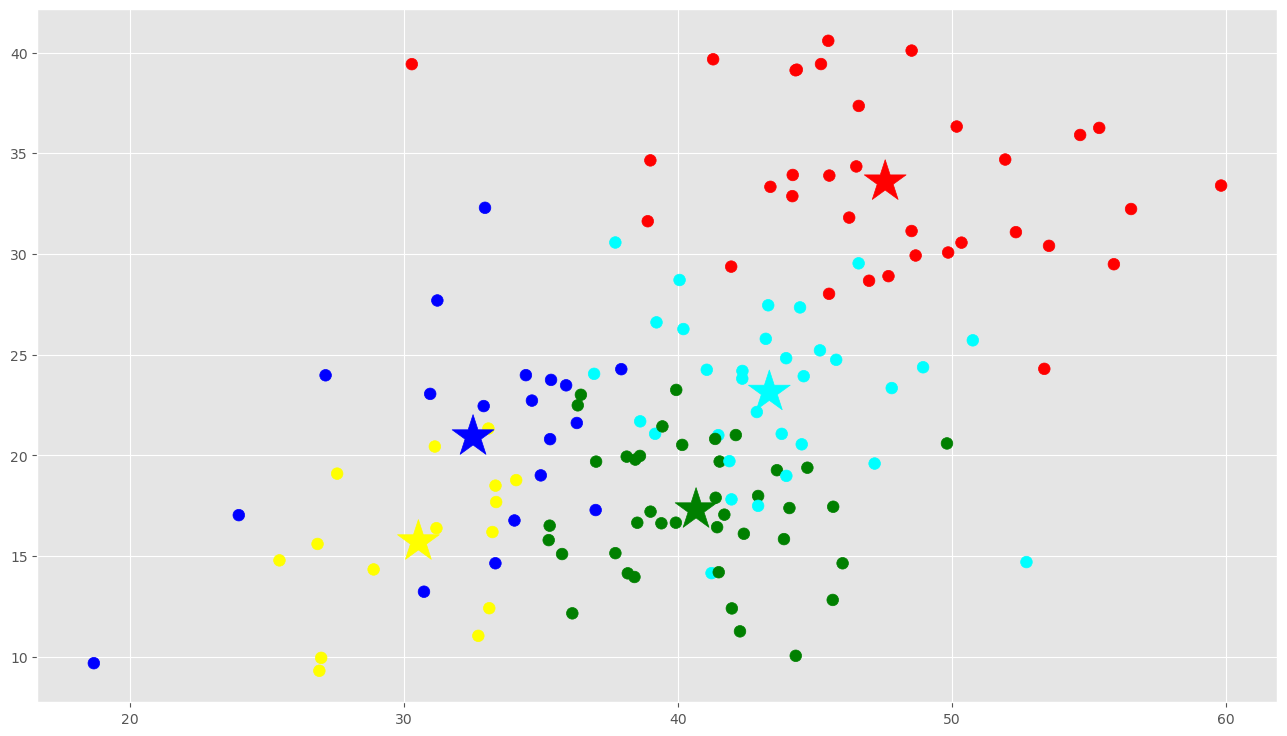

In [22]:
f1 = dataframe['ex'].values
f2 = dataframe['ag'].values

'''
# este codigo comentado agrega las categorias sobre cada punto
for label, x, y in zip(dataframe['categoria'].values, f1, f2):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-10, 10),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
'''
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

In [23]:
# contamos cuantos usuarios hay en cada grupo
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,34
1,green,40
2,blue,19
3,cyan,32
4,yellow,15


In [24]:
# Veamos cuantos usuarios en cada categoria hay en el grupo 0
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,3.0
2,2,4.0
3,3,NaN
4,4,12.0
5,5,3.0
6,6,1.0
7,7,5.0
8,8,3.0
9,9,3.0


In [25]:
#imprimimos en pantalla los usuarios con categoria 2 del grupo
for index, row in group_referrals.iterrows():
    if row["categoria"] == 2:
        print (row["usuario"], row["categoria"],row["label"])

AlejandroSanz 2 0
CarlosAuryn 2 0
davidbisbal 2 0
SerranoIsmael 2 0


In [26]:
#vemos el representante del grupo, el usuario cercano a su centroid
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 98,  21, 120,  64,  82])

In [27]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

maria_patino
carmenelectra
SarahPalinUSA
ierrejon
JudgeJudy


In [28]:
#miramos los usuarios del grupo 0
for index, row in copy.iterrows():
    if row["label"] == 0:
        print (row["usuario"], row["categoria"],row["label"])

3gerardpique 7 0
albertochicote 4 0
AlejandroSanz 2 0
alfredocasero1 4 0
andykusnetzoff 5 0
Berto_Romero 4 0
Buenafuente 4 0
CarlosAuryn 2 0
CasillasWorld 7 0
CFKArgentina 8 0
CristiPedroche 4 0
DaniMateoAgain 5 0
DANIROVIRA 1 0
davidbisbal 2 0
eva_hache 1 0
FALCAO 7 0
fieritacatalano 6 0
GeorgeHWBush 8 0
JesusCalleja 4 0
jordievole 4 0
jordiGlez 4 0
josjaviersantos 9 0
JPVarsky 5 0
manuginobili 7 0
maria_patino 4 0
NadalMiki 4 0
perezreverte 9 0
pnique 8 0
porliniers 9 0
ristomejide 4 0
SerranoIsmael 2 0
XabiAlonso 7 0
XaviRodriguez 4 0
_josecoronado_ 1 0


# Clasificación de nuevos registros

In [29]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta personality traits
new_labels = kmeans.predict(X_new)
print(new_labels)

#NOTA: en el array podemos poner más de un array para evaluar a varios usuarios nuevos a la vez

[3]


NOTA FINAL: Los resultados obtenidos pueden varias de ejecución en ejecución pues al inicializar aleatoriamente los centroids, podemos obtener grupos distintos o los mismos pero en distinto orden y color